# Manipulating Time Series Data in Python
#### Course Description
In this course you'll learn the basics of manipulating time series data. Time series data are data that are indexed by a sequence of dates or times. You'll learn how to use methods built into Pandas to work with this index. You'll also learn how resample time series to change the frequency. This course will also show you how to calculate rolling and cumulative values for times series. Finally, you'll use all your new skills to build a value-weighted stock index from actual stock data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. Working with Time Series in Pandas

This chapter lays the foundations to leverage the powerful time series functionality made available by how Pandas represents dates, in particular by the DateTimeIndex. You will learn how to create and manipulate date information and time series, and how to do calculations with time-aware DataFrames to shift your data in time or create period-specific returns.

### Your first time series
You have learned in the video how to create a sequence of dates using pd.date_range(). You have also seen that each date in the resulting pd.DatetimeIndex is a pd.Timestamp with various attributes that you can access to obtain information about the date.

Now, you'll create a week of data, iterate over the result, and obtain the dayofweek and weekday_name for each date.

#### Instructions

We have already imported pandas as pd for you.

Use pd.date_range to create seven dates starting from '2017-1-1' at (default) daily frequency. Use the arguments start and periods. Assign the result to seven_days.
Iterate over each date in seven_days and in each iteration, print the .dayofweek and .weekday_name attributes.

In [2]:
# Create the range of dates here
seven_days = pd.date_range(start ='2017-1-1', periods = 7  )

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())


    

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


### Create a time series of air quality data
You have seen in the video how to deal with dates that are not in the correct format, but instead are provided as string types, represented as dtype object in pandas.

We have prepared a data set with air quality data (ozone, pm25, and carbon monoxide for NYC, 2000-2017) for you to practice the use of pd.to_datetime().

#### Instructions

We have already imported pandas as pd and matplotlib.pyplot as plt for you, and loaded the air quality DataFrame into the variable data.

- Inspect data using .info().
- Use pd.to_datetime to convert the column 'date' to dtype datetime64.
- Set the 'date' column as index.
- Validate the changes by inspecting data using .info() again.
- Plot data using subplots=True.

In [3]:
data = pd.read_csv('air_quality_data/nyc.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


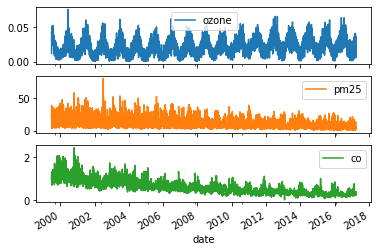

In [4]:
# Inspect data
print(data.info())

# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=1)
plt.show()

### Compare annual stock price trends
In the video, you have seen how to select sub-periods from a time series.

You'll use this to compare the performance for three years of Yahoo stock prices.

#### Instructions

We have already imported pandas as pd and matplotlib.pyplot as plt and we have already loaded the 'yahoo.csv' file in a variable yahoo with DateTimeIndex and a single column price.

- Create an empty pd.DataFrame() called prices.
- Iterate over a list containing the three years, 2013, 2014, and 2015, as string, and in each loop:
- Use the iteration variable to select the data for this year and the column price.
- Use .reset_index() with drop=True to remove the DatetimeIndex.
- Rename the column price column to the appropriate year.
- Use pd.concat() to combine the yearly data with the data in prices along axis=1.
- Plot prices.

In [5]:
yahoo = pd.read_csv('stock_data/yahoo.csv' , 
                    parse_dates=['date'], index_col='date')

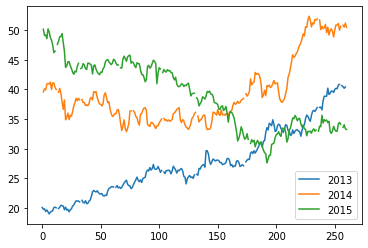

In [6]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in [ '2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

### Set and change time series frequency
In the video, you have seen how to assign a frequency to a DateTimeIndex, and then change this frequency.

Now, you'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

You'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.

#### Instructions

We have already loaded the co_cities.csv file in a variable co.

- Inspect co using .info().
- Use .asfreq() to set the frequency to calendar daily.
- Show a plot of 'co' using subplots=True.
- Change the the frequency to monthly using the alias 'M'.
- Show another plot of co using subplots=True.

In [7]:
co = pd.read_csv('air_quality_data/co_cities.csv',
                 parse_dates=['date'], index_col='date')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


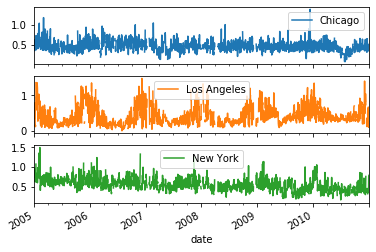

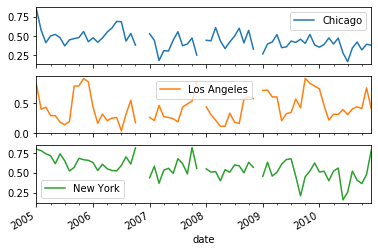

In [8]:
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=1)
plt.show()


# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=1)
plt.show()



### Shifting stock prices across time
The first method to manipulate time series that you saw in the video was .shift(), which allows you shift all values in a Series or DataFrame by a number of periods to a different time along the DateTimeIndex.

Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

#### Instructions
- Use pd.read_csv() to import 'google.csv', parsing the 'Date' as dates, setting the result as index and assigning to google.
- Use .asfreq() to set the frequency of google to business daily.
- Add new columns lagged and shifted to google that contain the Close shifted by 90 business days into past and future, respectively.
- Plot the three columns of google.

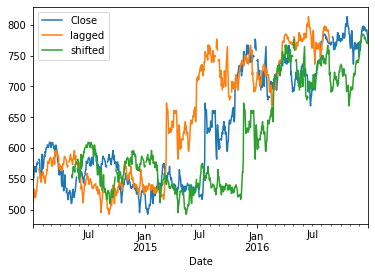

In [9]:
# Import data here
google = pd.read_csv('stock_data/google.csv',
                     parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods= -90)
google['shifted'] = google.Close.shift(periods= 90)

# Plot the google price series
google.plot()
plt.show()

### Calculating stock price changes
You have learned in the video how to calculate returns using current and shifted prices as input. Now you'll practice a similar calculation to calculate absolute changes from current and shifted prices, and compare the result to the function .diff().

#### nstructions

Set the frequency to business daily, and assigned the result to yahoo.

- Create a new column called shifted_30 that contains the 'price' shifted by 30 business days into the future.
- Subtract 'shifted_30' from 'price', and assign the result to a new column, 'change_30'.
- Apply .diff(), setting periods to 30, and assign the result to a new column, 'diff_30'.
- Inspect the last five rows of yahoo to verify the calculation.
- Subtract diff_30 from change_30 using the .sub() method and print the .value_counts() of the result to show both columns are equal.

In [10]:
yahoo = yahoo.asfreq('B')

In [11]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price - yahoo['shifted_30']

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods= 30 )

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.diff_30.sub(yahoo.change_30).value_counts())

            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


### Plotting multi-period returns
The last time series method you have learned about in the video was .pct_change(). Let's use this function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

We'll be using Google stock prices from 2014-2016.

#### Instructions

We have loaded 'GOOG' stock prices for the years 2014-2016, set the frequency to calendar daily, and assigned the result to google.

Create the columns 'daily_return', 'monthly_return', and 'annual_return' that contain the pct_change() of 'Close' for 1, 30 and 360 calendar days, respectively, and multiply each by 100.
Plot the result using subplots=True.

In [12]:
google = google.asfreq('D')

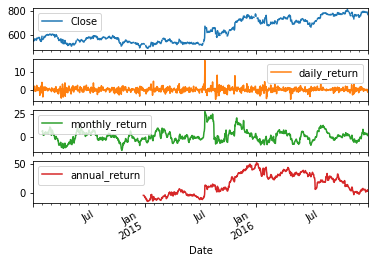

In [13]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(periods= 1)*100

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(periods= 30)*100

# Create annual_return
google['annual_return'] = google.Close.pct_change(periods= 360)*100

# Plot the result
google[['Close','daily_return','monthly_return','annual_return']].plot(subplots=1)
plt.show()

# 2. Basic Time Series Metrics & Resampling

This chapter dives deeper into the essential time series functionality made available through the pandas DataTimeIndex. It introduces resampling and how to compare different time series by normalizing their start points.

### Compare the performance of several asset classes
You have seen in the video how you can easily compare several time series by normalizing their starting points to 100, and plot the result.

To broaden your perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.

#### Instructions
- Import 'asset_classes.csv', using .read_csv() to parse dates in the 'DATE' column and set this column as the index, then assign the result to prices.
- Select the first price for each series using .iloc[0] on prices and assign the result to first_prices.
- Divide prices by first_prices, multiply by 100 and assign the result to normalized.
- Plot normalized.


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


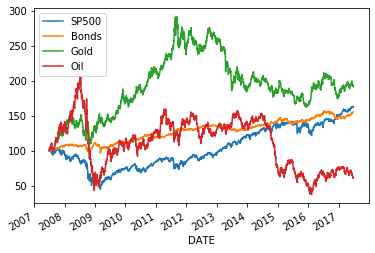

In [14]:
# Import data here
prices = pd.read_csv('stock_data/asset_classes.csv',
                      parse_dates = ['DATE'], index_col = 'DATE')

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot()
plt.show()


### Comparing stock prices with a benchmark
You also learned in the video how to compare the performance of various stocks against a benchmark. Now you'll learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

The three largest companies on the NYSE are:

| Company           | Stock Ticker |
|-------------------|--------------|
| Johnson & Johnson | JNJ          |
| Exxon Mobil       | XOM          |
| JP Morgan Chase   | JPM          |

#### Instructions


- Use pd.read_csv() to import 'nyse.csv' and 'dow_jones.csv', creating a DatetimeIndex for each from the 'date' column using parse_dates and index_col, and assign the result to stocks and dow_jones, respectively.
- Use pd.concat() along axis=1 to combine stocks and dow_jones and assign the result to data. Inspect the .info() of data.
- Divide data by the first value for each series, multiply by 100 and plot the result.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


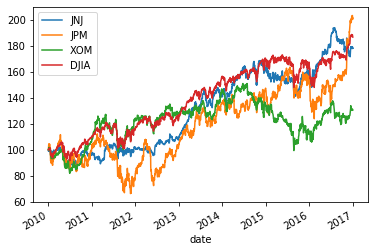

In [15]:
# Import stock prices and index here
stocks = pd.read_csv('stock_data/nyse.csv', parse_dates = ['date'], index_col = 'date')
dow_jones = pd.read_csv('stock_data/dow_jones.csv', parse_dates = ['date'], index_col = 'date')

# Concatenate data and inspect result here
data = pd.concat([stocks,dow_jones], axis = 1)
print(data.info())

# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot()
plt.show()

### Plot performance difference vs benchmark index
In the video, you learned how to calculate and plot the performance difference of a stock in percentage points relative to a benchmark index.

Let's compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.

#### Instructions

- Create the list tickers containing the two stock symbols.
- Use pd.read_csv() to import 'msft_aapl.csv' and 'sp500.csv', creating a - DatetimeIndex for each from the 'date' column using parse_dates and index_col, and assign the result to stocks and sp500, respectively.
- Use pd.concat() to concatenate stocks and sp500 along axis=1, apply .dropna() to drop all missing values, and assign the result to data.
- Normalize data by dividing by the first price, multiply by 100 and assign the output to normalized.
- Select tickers from normalized, and subtract normalized['SP500'] with keyword axis=0 to align the indexes, then plot the result.

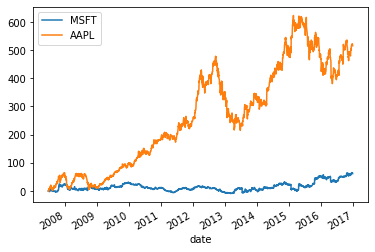

In [16]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('stock_data/msft_aapl.csv', parse_dates = ['date'], index_col = 'date')

# Import index here
sp500 = pd.read_csv('stock_data/sp500.csv', parse_dates = ['date'], index_col = 'date')

# Concatenate stocks and index here
data = pd.concat([stocks,sp500], axis = 1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'],axis = 0).plot()
plt.show()


### Convert monthly to weekly data
You have learned in the video how to use .reindex() to conform an existing time series to a DateTimeIndex at a different frequency.

Let's practice this method by creating monthly data and then converting this data to weekly frequency while applying various fill logic options.

#### Instructions

- Create monthly_dates using pd.date_range with start, end and frequency alias 'M'.
- Create and print the pd.Series monthly, passing the list [1, 2] as the data argument, and using monthly_dates as index.
- Create weekly_dates using pd.date_range with start, end and frequency alias 'W'.
- Apply .reindex() to monthly three times: first without additional options, then with bfill and then with ffill, print()-ing each result.

In [17]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start = start, end = end, freq='M')

# Create and print monthly here
monthly = pd.Series(data = [1,2], index = monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start = start, end = end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))


2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


### Create weekly from monthly unemployment data
The civilian US unemployment rate is reported monthly. You may need more frequent data, but that's no problem because you just learned how to upsample a time series.

You'll work with the time series data for the last 20 years, and apply a few options to fill in missing values before plotting the weekly series.

#### Instructions
- Use pd.read_csv() to import 'unemployment.csv', creating a DateTimeIndex from the 'date' column using parse_dates and index_col, and assign the result to data.
- Convert data to weekly frequency using .asfreq() with the alias 'W' and show the first five rows.
- Convert again to weekly frequency, adding the option 'bfill' and show the first five rows.
- Create weekly series, now adding the option 'ffill', assign to weekly_ffill and show the first five rows.
- Plot weekly_ffill starting in 2015.

            UNRATE
date              
2000-01-02     NaN
2000-01-09     NaN
2000-01-16     NaN
2000-01-23     NaN
2000-01-30     NaN
            UNRATE
date              
2000-01-02     4.1
2000-01-09     4.1
2000-01-16     4.1
2000-01-23     4.1
2000-01-30     4.1
            UNRATE
date              
2000-01-02     4.0
2000-01-09     4.0
2000-01-16     4.0
2000-01-23     4.0
2000-01-30     4.0


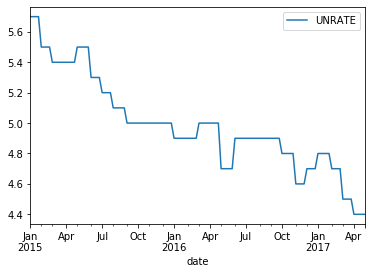

In [18]:
# Import data here
data = pd.read_csv('stock_data/unrate_2000.csv', parse_dates=['date'], index_col='date')

# Show first five rows of weekly series
print(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 

weekly_ffill['2015':].plot()
plt.show()


### Use interpolation to create weekly employment data
You have recently used the civilian US unemployment rate, and converted it from monthly to weekly frequency using simple forward or backfill methods.

Compare your previous approach to the new .interpolate() method that you learned about in this video.

#### Instructions

We have loaded the monthly unemployment rate from 2010 to 2016 into a variable monthly.

Inspect monthly using .info().
Create a pd.date_range() with weekly dates, using the .min() and .max() of the index of monthly as start and end, respectively, and assign the result to weekly_dates.
Apply .reindex() using weekly_dates to monthly and assign the output to weekly.
Create new columns 'ffill' and 'interpolated' by applying .ffill() and .interpolate() to weekly.UNRATE.
Show a plot of weekly.

In [19]:
monthly = data.loc['2010':'2016']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2010-01-01 to 2016-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  84 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB
None


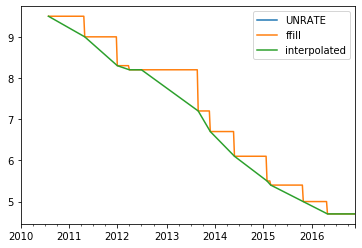

In [20]:
# Inspect data here
print(monthly.info())

# Create weekly dates
weekly_dates = pd.date_range(start = monthly.index.min(), end = monthly.index.max(), freq='W')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

# Plot weekly
weekly.plot()
plt.show()

### Interpolate debt/GDP and compare to unemployment
Since you have learned how to interpolate time series, you can now apply this new skill to the quarterly debt/GDP series, and compare the result to the monthly unemployment rate.

#### Instructions

- Use pd.read_csv() to import 'debt_unemployment.csv', creating a DateTimeIndex from the 'date' column using parse_dates and index_col, and assign the result to data. print() the .info() of the data.
- Apply .interpolate() to data and assign this to interpolated, then inspect the result.
- Plot interpolated with 'Unemployment' on the secondary_y axis.


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


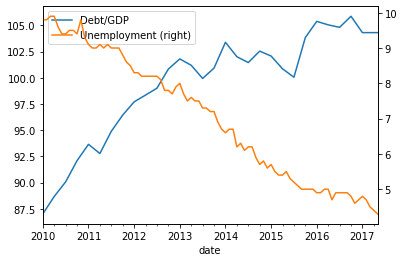

In [21]:
# Import & inspect data here
data = pd.read_csv('stock_data/debt_unemployment.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y = 'Unemployment')
plt.show()


### Compare weekly, monthly and annual ozone trends for NYC & LA
You have seen in the video how to downsample and aggregate time series on air quality.

First, you'll apply this new skill to ozone data for both NYC and LA since 2000 to compare the air quality trend at weekly, monthly and annual frequencies and explore how different resampling periods impact the visualization.

#### Instructions

- Use pd.read_csv() to import 'ozone.csv' and set a DateTimeIndex based on the 'date' column using parse_dates and index_col, assign the result to ozone and inspect using .info().
- Apply .resample() with weekly frequency ('W') to ozone, aggregate using .mean() and plot the result.
- Repeat with monthly ('M') and annual ('A') frequencies, plotting each result.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  5488 non-null   float64
 1   New York     6167 non-null   float64
dtypes: float64(2)
memory usage: 147.4 KB
None


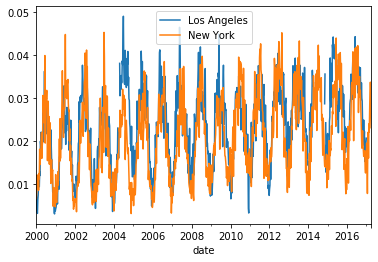

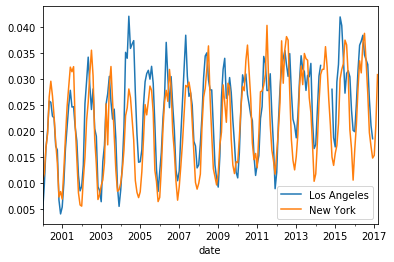

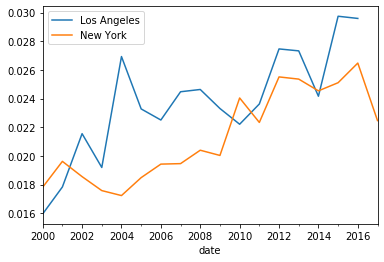

In [22]:
# Import and inspect data here
ozone = pd.read_csv('air_quality_data/ozone_nyla.csv', 
                    parse_dates=['date'], index_col='date')
print(ozone.info())

# Calculate and plot the weekly average ozone trend
ozone.resample('w').mean().plot()
plt.show()

# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot()
plt.show()

# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot()
plt.show()

### Compare monthly average stock prices for Facebook and Google
Now, you'll apply your new resampling skills to daily stock price series for Facebook and Google for the 2015-2016 period to compare the trend of the monthly averages.

#### Instructions

- Use pd.read_csv() to import 'stocks.csv' and set a DateTimeIndex based on the 'date' column using parse_dates and index_col, assign the result to stocks and inspect using .info().
- Create monthly_average by applying .resample() with monthly frequency to data, using .mean() to aggregate. Plot the result using subplots.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      504 non-null    float64
 1   GOOG    504 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB
None


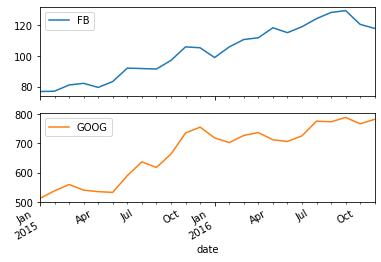

In [23]:
# Import and inspect data here
stocks = pd.read_csv('stock_data/goog_fb.csv', parse_dates=['date'], index_col='date')
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots= True)
plt.show()




### Compare quarterly GDP growth rate and stock returns
With your new skill to downsample and aggregate time series, you can compare higher-frequency stock price series to lower-frequency economic time series.

As a first example, let's compare the quarterly GDP growth rate to the quarterly rate of return on the (resampled) Dow Jones Industrial index of 30 large US stocks.

GDP growth is reported at the beginning of each quarter for the previous quarter. To calculate matching stock returns, you'll resample the stock index to quarter start frequency using the alias 'QS', and aggregating using the .first() observations.

#### Instructions


- Use pd.read_csv() to import 'gdp_growth.csv' and 'djia.csv', for both set a DateTimeIndex based on the 'date' column using parse_dates and index_col, and assign the results to gdp_growth and djia respectively, then inspect using .info().
- Resample djia using frequency alias 'QS', aggregate using .first(), and assign to djia_quarterly.
- Apply .pct_change() to djia_quarterly and .mul() by 100 to obtain djia_quarterly_return.
- Use pd.concat() to concatenate gdp_growth and djia_quarterly_return along axis=1, and assign to data. Rename the columns using .columns and the new labels 'gdp' and 'djia', then .plot() the results.

# 3. Window Functions: Rolling & Expanding Metrics

This chapter will show you how to use window function to calculate time series metrics for both rolling and expanding windows.

# 4. Putting it all together: Building a value-weighted index

This chapter combines the previous concepts by teaching you how to create a value-weighted index. This index uses market-cap data contained in the stock exchange listings to calculate weights and 2016 stock price information. Index performance is then compared against benchmarks to evaluate the performance of the index you created.